# **Project-2 Employee Turnover Prediction**

## **Installing Kaggle Library**

In [2]:
! pip install kaggle

## **Kaggle.json file**

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## **Importing the Dataset**

### API to fetch employee-turnover-prediction dataset from kaggle

In [4]:
!kaggle kernels pull aliu233/employee-turnover-prediction

Source code downloaded to /content/employee-turnover-prediction.ipynb


## **Importing the dependencies**

In [5]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


## **Creating input directory**

In [6]:
import subprocess

subprocess.run(["mkdir", "-p", "../input"])
print("Directory '../input' created successfully.")

Directory '../input' created successfully.


In [7]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

## **Read the CSV file**

In [9]:
df = pd.read_csv('../input/HR_comma_sep.csv', index_col=None)

In [10]:
import tensorflow as tf

In [11]:
node1 = tf.constant(3.0)
node2 = tf.constant(4.0)
print(node1, node2)

tf.Tensor(3.0, shape=(), dtype=float32) tf.Tensor(4.0, shape=(), dtype=float32)


## **Analyze Data**

In [12]:
print(df.columns.values)

['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident' 'left'
 'promotion_last_5years' 'sales' 'salary']


In [13]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## **Check for missing data**

In [15]:
df.isnull().any()

,0
satisfaction_level,False
last_evaluation,False
number_project,False
average_montly_hours,False
time_spend_company,False
Work_accident,False
left,False
promotion_last_5years,False
sales,False
salary,False


## **Check for categorical data type**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### The columns sales and salary are categorical data types that need to be converted to numerical values.

## **Check the distribution of categorical value**

In [17]:
df.describe(include=['O'])

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [18]:
df['salary'] = df['salary'].map({'low':0, 'medium':1, 'high':2}).astype(int)

In [19]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


### Convert "sales" variable to number

In [20]:
old = []
for obj in df['sales']:
  if obj not in old:
    print(obj)
    old.append(obj)

sales
accounting
hr
technical
support
management
IT
product_mng
marketing
RandD


### Map all of the job titles to numbers

In [21]:
df['sales'] = df['sales'].map({'RandD':0, 'marketing':1, 'product_mng':2, 'IT':3,
   'management':4, 'support':5, 'technical': 6, 'hr':7,
   'accounting':8, 'sales':9})

In [22]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,9,0
1,0.80,0.86,5,262,6,0,1,0,9,1
2,0.11,0.88,7,272,4,0,1,0,9,1
3,0.72,0.87,5,223,5,0,1,0,9,0
4,0.37,0.52,2,159,3,0,1,0,9,0


## **Find correlation of data and leaving rate**

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   
sales                           -0.015413        -0.011855       -0.005577   
salary                           0.050022        -0.013002       -0.001803   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_ev

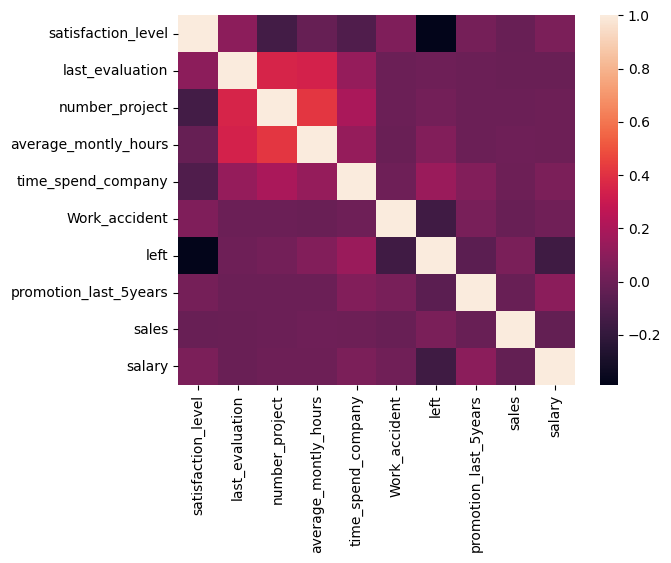

In [23]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
print(corr)

In [24]:
df[['left', 'satisfaction_level']].groupby(['left'],
as_index = False).mean().sort_values(by='satisfaction_level', ascending=False)

,left,satisfaction_level
0,0,0.666810
1,1,0.440098


In [25]:
df[['left', 'Work_accident']].groupby(['left'],
as_index=False).mean().sort_values(by='Work_accident', ascending=False)

,left,Work_accident
0,0,0.175009
1,1,0.047326


In [26]:
df[['left', 'time_spend_company']].groupby(['time_spend_company'],
as_index=False).mean().sort_values(by='left', ascending=False)

,time_spend_company,left
3,5,0.565513
2,4,0.348064
4,6,0.291086
1,3,0.246159
0,2,0.016338
5,7,0.000000
6,8,0.000000
7,10,0.000000


In [27]:
df[['left', 'salary']].groupby(['salary'],
as_index=False).mean().sort_values(by='left', ascending=False)

,salary,left
0,0,0.296884
1,1,0.204313
2,2,0.066289


## **Visualize and convert continuous data to discrete**

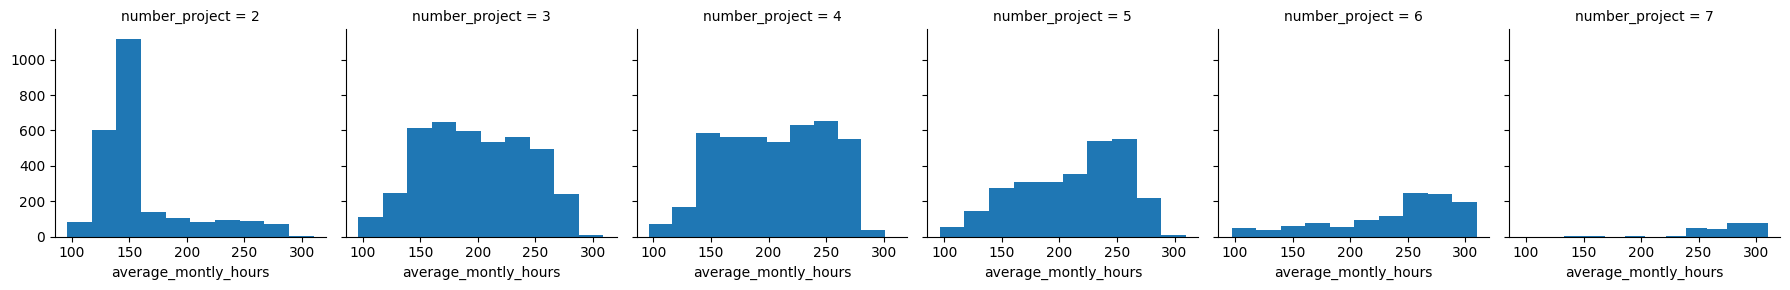

In [28]:
g = sns.FacetGrid(df, col='number_project')
g.map(plt.hist, 'average_montly_hours', bins = 10)

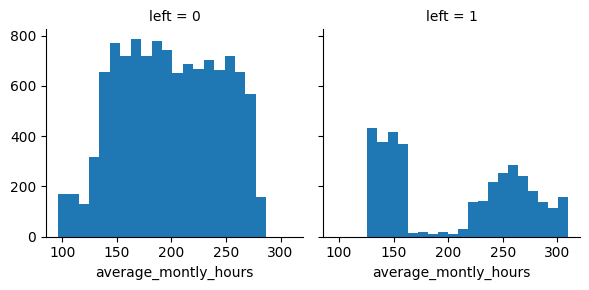

In [29]:
g = sns.FacetGrid(df, col='left')
g.map(plt.hist, 'average_montly_hours', bins=20)

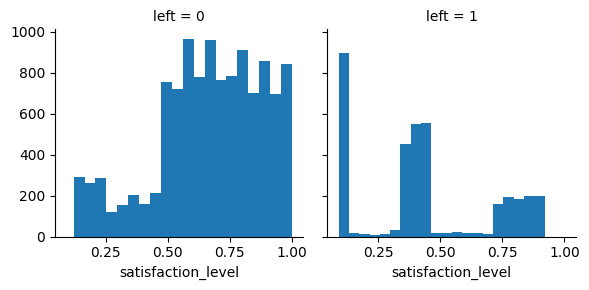

In [30]:
g = sns.FacetGrid(df, col='left')
g.map(plt.hist, 'satisfaction_level', bins=20)

In [31]:
df.loc[df['satisfaction_level'] <= 0.25, 'satisfaction_level'] = 0
df.loc[(df['satisfaction_level'] > 0.25) & (df['satisfaction_level'] <= 0.5), 'satisfaction_level'] = 1
df.loc[(df['satisfaction_level'] > 0.5) & (df['satisfaction_level'] <= 0.75), 'satisfaction_level'] = 0
df.loc[df['satisfaction_level'] > 0.75, 'satisfaction_level'] = 1
df['satisfaction_level'] = df['satisfaction_level'].astype(int)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,1,0.53,2,157,3,0,1,0,NaN,0
1,1,0.86,5,262,6,0,1,0,NaN,1
2,0,0.88,7,272,4,0,1,0,NaN,1
3,0,0.87,5,223,5,0,1,0,NaN,0
4,1,0.52,2,159,3,0,1,0,NaN,0


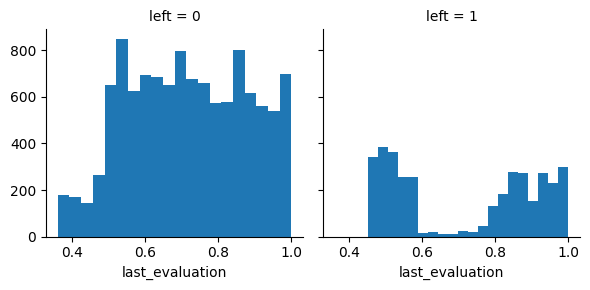

In [32]:
g = sns.FacetGrid(df, col='left')
g.map(plt.hist, 'last_evaluation', bins=20)

In [33]:
df.loc[ df['last_evaluation'] <= 0.56, 'last_evaluation'] = 0
df.loc[(df['last_evaluation'] > 0.56) & (df['last_evaluation'] <= 0.80), 'last_evaluation'] = 1
df.loc[ df['last_evaluation'] > 0.80, 'last_evaluation'] = 0
df['last_evaluation'] = df['last_evaluation'].astype(int)

In [34]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,1,0,2,157,3,0,1,0,9,0
1,1,0,5,262,6,0,1,0,9,1
2,0,0,7,272,4,0,1,0,9,1
3,0,0,5,223,5,0,1,0,9,0
4,1,0,2,159,3,0,1,0,9,0


## **Create new column from existing data**

In [35]:
df['proj*hour'] = df.number_project * df.average_montly_hours
df.loc[:, ['proj*hour', 'number_project', 'average_montly_hours']].head(10)

,proj*hour,number_project,average_montly_hours
0,314,2,157
1,1310,5,262
2,1904,7,272
3,1115,5,223
4,318,2,159
5,306,2,153
6,1482,6,247
7,1295,5,259
8,1120,5,224
9,284,2,142


## **Remove duplicate datasets**



In [36]:
df = df.drop(['number_project', 'average_montly_hours'], axis=1)

In [37]:
df.head()

,satisfaction_level,last_evaluation,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,proj*hour
0,1,0,3,0,1,0,9,0,314
1,1,0,6,0,1,0,9,1,1310
2,0,0,4,0,1,0,9,1,1904
3,0,0,5,0,1,0,9,0,1115
4,1,0,3,0,1,0,9,0,318


## **Split train and test datasets**

In [38]:
nHead = int(len(df)*0.85)
nTail = int(len(df)*0.15)
X_train = df.drop("left", axis=1).head(nHead)
X_test  = df.drop("left", axis=1).tail(nTail)
Y_train = df["left"].head(nHead)
Y_test = df["left"].tail(nTail)
X_train.shape, X_test.shape

((12749, 8), (2249, 8))

## Modeling with dataset

Support Vector Machines

In [39]:
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc

84.62

k-nearest neighbors

In [40]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

95.82

Decision tree

In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

99.64